# Problem 7.6

This problem refers to problem 5.5 where three different configurations of an LRC network have to be modelled. 


#### Initialization

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

##### Parameter values

First set the parameter values for the rest of the calculations.

In [4]:
R = 10**6
L = 10**-3
C = 10**-6
omegan = 1/np.sqrt(L * C)
zeta = np.sqrt(L * C)/(2 * R * C)

Now define the Transfer functions:

In [7]:
tfa = signal.TransferFunction([omegan**2],[1, 2 * zeta * omegan, omegan**2])
tfb = signal.TransferFunction([2 * zeta * omegan, 0],[1, 2 * zeta * omegan, omegan**2])
tfc = signal.TransferFunction([1, 0, 0],[1, 2 * zeta * omegan, omegan**2])

In [14]:
ws = np.linspace(10**4, 10**5,300)       # Define the frequency range
wa, maga, phasea = tfa.bode(ws)
wb, magb, phaseb = tfb.bode(ws)
wc, magc, phasec = tfc.bode(ws)

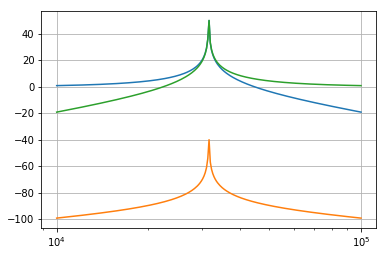

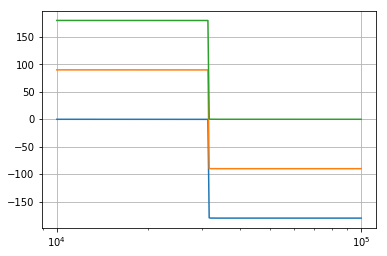

In [15]:
plt.figure()
plt.semilogx(wa, maga)    # Bode magnitude plot system a
plt.semilogx(wb, magb)    # Bode magnitude plot system b
plt.semilogx(wc, magc)    # Bode magnitude plot system c
plt.grid(True)
plt.figure()
plt.semilogx(wa, phasea)  # Bode phase plot system a
plt.semilogx(wb, phaseb)  # Bode phase plot system b
plt.semilogx(wc, phasec)  # Bode phase plot system c
plt.grid(True)
plt.show()

Now calcualte the stepresponse

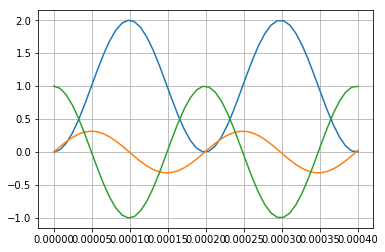

In [20]:
t = np.linspace(0, 4*10**-4)
u = np.ones_like(t)
ta, ya, xa = signal.lsim(tfa, u, t)
tb, yb, xb = signal.lsim(tfb, u, t)
tc, yc, xc = signal.lsim(tfc, u, t)
plt.plot(ta, ya)
plt.plot(tb, yb*10**4)
plt.plot(tc, yc)
plt.grid(True)
plt.show()

In [25]:
zpka = signal.tf2zpk([omegan**2],[1, 2 * zeta * omegan, omegan**2])

In [26]:
zpka

(array([], dtype=float64),
 array([-0.5+31622.77659773j, -0.5-31622.77659773j]),
 999999999.9999999)